In [1]:
%matplotlib inline

import numpy as np
import modisco
import simdna.synthetic as synthetic

!./grab_data.sh
data_filename = "sequences.simdata.gz"
data = synthetic.read_simdata_file(data_filename)
task0_indices = np.nonzero(data.labels[:,0] == 1)[0]

File sequences.simdata.gz exists already


In [2]:
def one_hot_encode_along_channel_axis(sequence):
    #theano dim ordering, uses row axis for one-hot
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1
            
onehot_data = np.array(
    [one_hot_encode_along_channel_axis(seq)
     for seq in data.sequences])[task0_indices]
print(onehot_data.shape)

(2000, 200, 4)


In [3]:
onehot_data.shape

(2000, 200, 4)

In [4]:
scores = np.load("task0importancescores.npy")

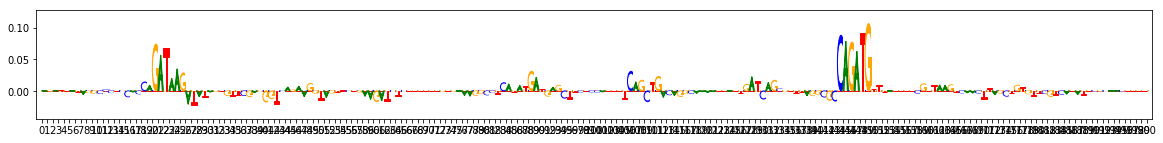

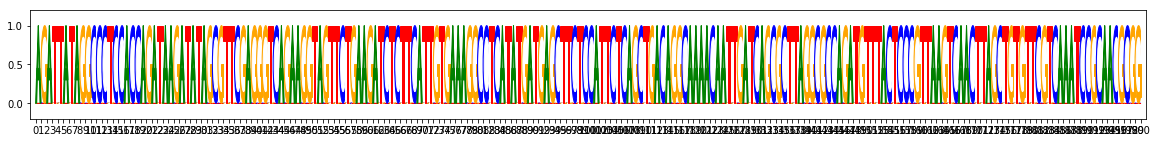

In [5]:
import modisco.visualization
from modisco.visualization import viz_sequence

viz_sequence.plot_weights(scores[0])
viz_sequence.plot_weights(onehot_data[0])

In [6]:
import numpy as np

def one_hot_encode_along_channel_axis(sequence):
    #theano dim ordering, uses row axis for one-hot
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1
            
onehot_data = np.array([one_hot_encode_along_channel_axis(seq)
                        for seq in data.sequences])[task0_indices]
print(onehot_data.shape)

(2000, 200, 4)


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29



On task task0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Done 0
Got 11625 coords
Computing thresholds
Bandwidth calculated: 0.0927823372185


Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN not available)


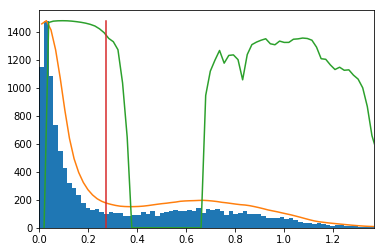

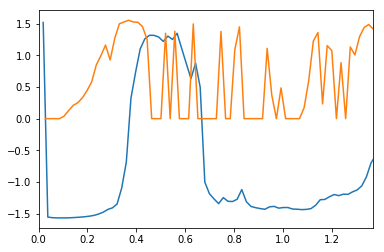

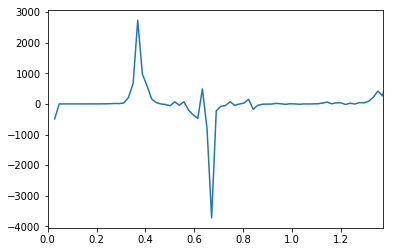

Computed threshold 0.274169871807
4611 coords remaining after thresholding
After resolving overlaps, got 4611 seqlets
1 activity patterns with support >= 200 out of 3 possible patterns
Metacluster sizes:  [4611]
Idx to activities:  {0: '1'}
On metacluster 0
Metacluster size 4611
Relevant tasks:  ('task0',)
Relevant signs:  (1,)
(Round 1) num seqlets: 4611
(Round 1) Computing coarse affmat
Beginning embedding computation
Computing embeddings
Finished embedding computation in 46.32 s
Starting affinity matrix computations
Normalization computed in 35.84 s
Cosine similarity mat computed in 56.1 s
Normalization computed in 35.85 s
Cosine similarity mat computed in 56.19 s
Finished affinity matrix computations in 112.42 s
(Round 1) Compute nearest neighbors from coarse affmat
Computed nearest neighbors in 5.21 s
(Round 1) Computing affinity matrix on nearest neighbors
Launching nearest neighbors affmat calculation job
Job completed in: 14.88 s
Launching nearest neighbors affmat calculation j

[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:    1.1s finished


Louvain completed 200 runs in 2.17180800438 seconds
Wrote graph to binary file in 0.143832206726 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.789639
After 3 runs, maximum modularity is Q = 0.789694
Louvain completed 53 runs in 2.58990287781 seconds
Preproc + Louvain took 5.05816102028 s
Got 9 clusters after round 1
Counts:
{0: 190, 1: 159, 2: 147, 3: 111, 4: 96, 5: 73, 6: 69, 7: 69, 8: 4}
(Round 1) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 190 seqlets
Trimmed 2 out of 190
Skipped 47 seqlets
Aggregating for cluster 1 with 159 seqlets
Trimmed 4 out of 159
Skipped 32 seqlets
Aggregating for cluster 2 with 147 seqlets
Trimmed 5 out of 147
Skipped 33 seqlets
Aggregating for cluster 3 with 111 seqlets
Trimmed 1 out of 111
Skipped 18 seqlets
Aggregating for cluster 4 with 96 seqlets
Trimmed 9 out of 96
Skipped 12 seqlets
Aggregating for cluster 5 with 73 seqlets
Trimmed 0 out of 73
Skipped 12 seqlets
Aggregating for cluster

[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:    1.0s finished


Louvain completed 200 runs in 1.73307490349 seconds
Wrote graph to binary file in 0.0913689136505 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.808133
After 25 runs, maximum modularity is Q = 0.809578
After 30 runs, maximum modularity is Q = 0.809972
Louvain completed 80 runs in 3.31907606125 seconds
Preproc + Louvain took 5.2793469429 s
Got 12 clusters after round 2
Counts:
{0: 118, 1: 117, 2: 87, 3: 87, 4: 57, 5: 52, 6: 51, 7: 40, 8: 34, 9: 29, 10: 20, 11: 11}
(Round 2) Aggregating seqlets in each cluster
Aggregating for cluster 0 with 118 seqlets
Trimmed 3 out of 118
Skipped 6 seqlets
Aggregating for cluster 1 with 117 seqlets
Trimmed 1 out of 117
Skipped 7 seqlets
Aggregating for cluster 2 with 87 seqlets
Trimmed 1 out of 87
Skipped 9 seqlets
Aggregating for cluster 3 with 87 seqlets
Trimmed 1 out of 87
Skipped 5 seqlets
Aggregating for cluster 4 with 57 seqlets
Trimmed 4 out of 57
Skipped 4 seqlets
Aggregating for cluster 5 with 52 seqle

In [7]:
import h5py
import numpy as np
%matplotlib inline
import modisco
reload(modisco)
import modisco.backend
reload(modisco.backend.theano_backend)
reload(modisco.backend)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat.core)
reload(modisco.affinitymat.transformers)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.cluster
reload(modisco.cluster.core)
reload(modisco.cluster.phenograph.core)
reload(modisco.cluster.phenograph.cluster)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)

tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow()(
                task_names=["task0"],
                contrib_scores={'task0': scores},
                hypothetical_contribs={'task0': scores},
                one_hot=onehot_data)

In [9]:
import h5py
import modisco.util
reload(modisco.util)
!rm task0_results.hdf5
grp = h5py.File("task0_results.hdf5")
tfmodisco_results.save_hdf5(grp)

4
pattern_0
('total seqlets:', 289)
fwd:


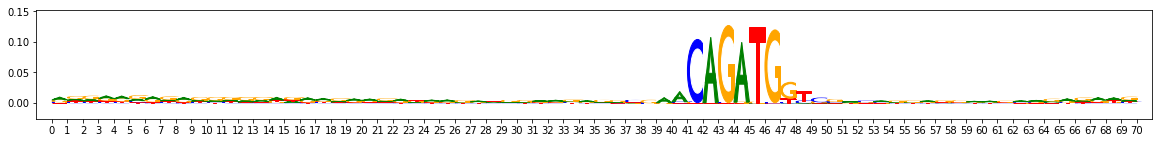

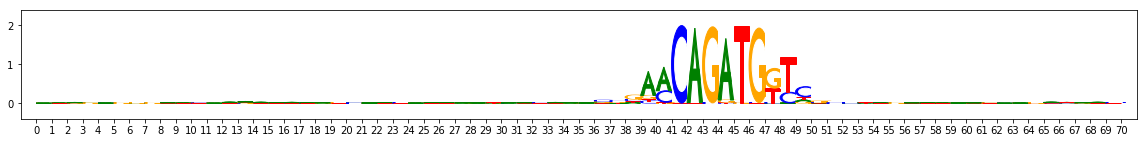

reverse:


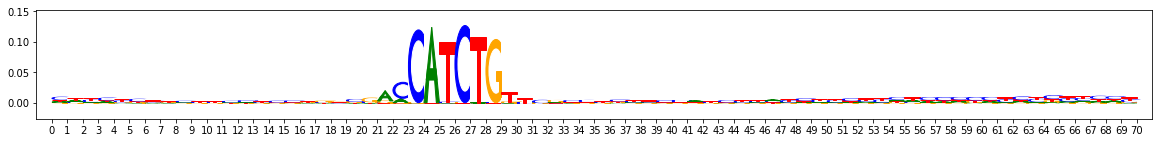

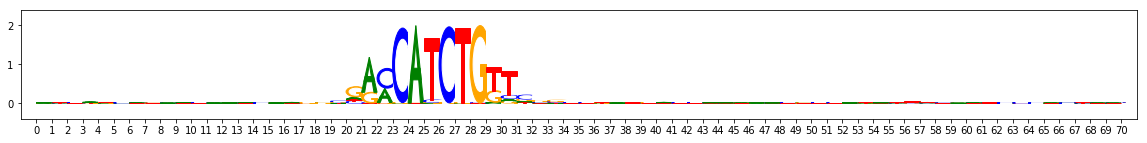

pattern_1
('total seqlets:', 79)
fwd:


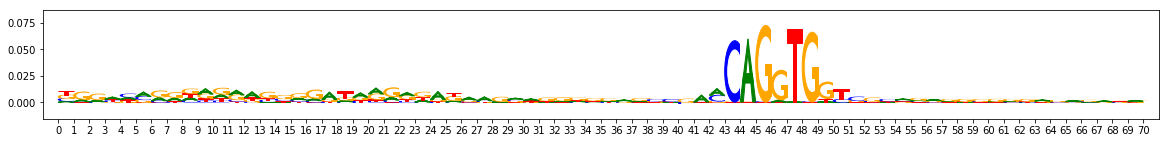

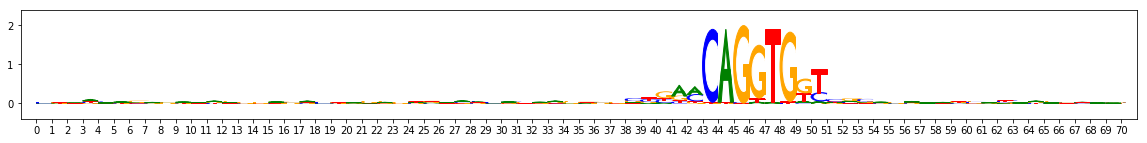

reverse:


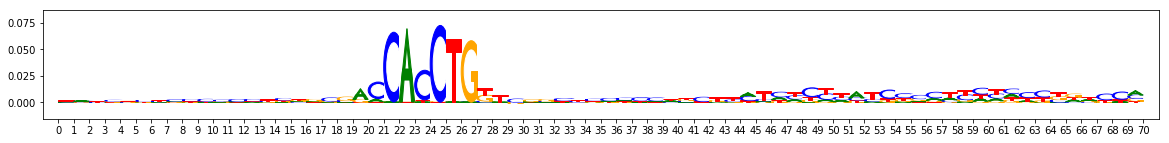

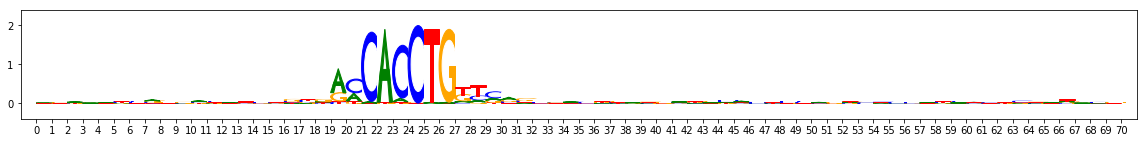

pattern_2
('total seqlets:', 76)
fwd:


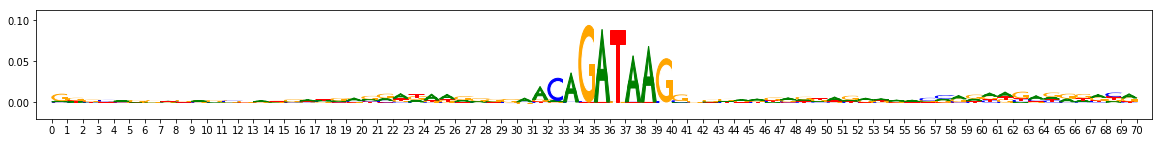

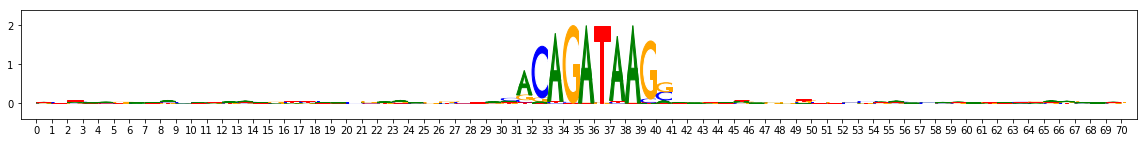

reverse:


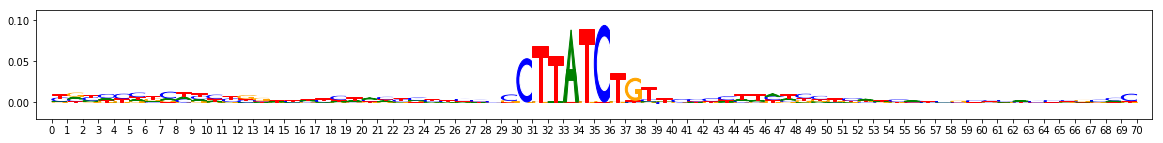

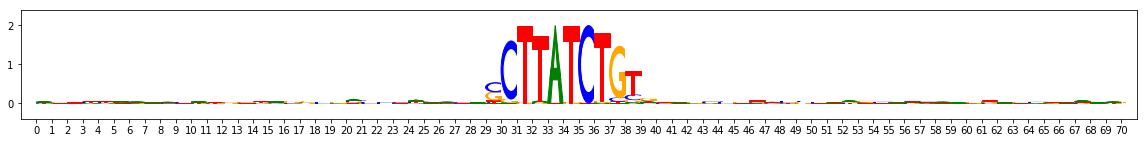

pattern_3
('total seqlets:', 62)
fwd:


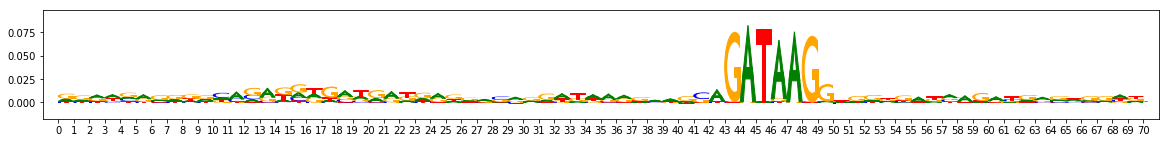

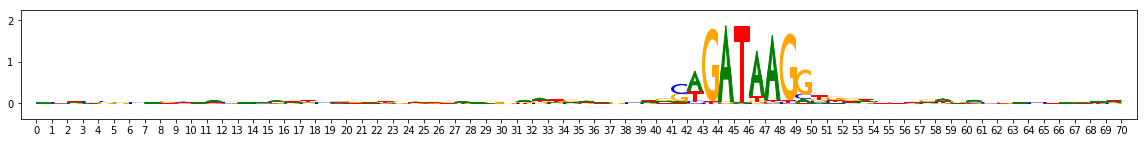

reverse:


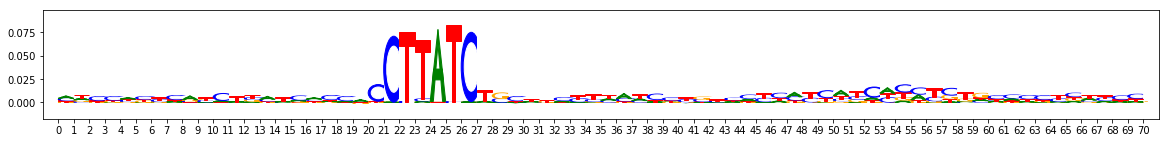

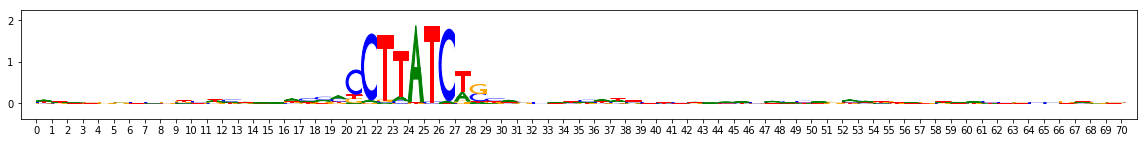

In [10]:
from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

import sklearn.decomposition
import sklearn.manifold

hdf5_results = h5py.File("task0_results.hdf5")

#patterns = (tfmodisco_results
#            .metacluster_idx_to_submetacluster_results[0]
#            .seqlets_to_patterns_result.patterns);
patterns = (list(hdf5_results
                 ["metacluster_idx_to_submetacluster_results"]
                 ["metacluster0"]
                 ["seqlets_to_patterns_result"]
                 ["patterns"]["all_pattern_names"]))
print(len(patterns))
pattern_grp = (hdf5_results
                 ["metacluster_idx_to_submetacluster_results"]
                 ["metacluster0"]
                 ["seqlets_to_patterns_result"]
                 ["patterns"])

for pattern_name in patterns:
    pattern = pattern_grp[pattern_name]
    print(pattern_name)
    print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
    #pattern.plot_counts(counts=aggregated_seqlet.get_per_position_seqlet_center_counts())
    background = np.array([0.27, 0.23, 0.23, 0.27])
    print("fwd:")
    viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                    background=background))

    print("reverse:")
    viz_sequence.plot_weights(pattern["task0_contrib_scores"]["rev"])
    viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                    background=background))